#  Dataset: House Prices - Advanced Regression Techniques

---

##  Objetivo del dataset
- **Meta principal**: **Predecir el precio de venta de una casa (`SalePrice`)** en la ciudad de Ames (Iowa, EE.UU.).
- **Cómo se logra**: mediante modelos de **regresión múltiple** u otros algoritmos de Machine Learning, usando como insumo las características de la casa (tamaño, materiales, condiciones, ubicación, etc.).

---

##  Pasos para llegar al objetivo
1. **Comprensión del problema**  
   - Variable dependiente: `SalePrice`.
   - Variables independientes: características estructurales, de ubicación, materiales y extras.

2. **Exploración de los datos (EDA)**  
   - Revisar registros, valores nulos, tipos de datos.
   - Generar estadísticas descriptivas y distribuciones.

3. **Limpieza de datos**  
   - Imputar o eliminar valores faltantes (`NA`).
   - Tratar valores atípicos.
   - Agrupar categorías poco frecuentes.

4. **Codificación de variables categóricas**  
   - Usar *One Hot Encoding* o *Label Encoding*.

5. **Escalamiento / Normalización**  
   - Aplicar sobre variables numéricas cuando el modelo lo requiera.

6. **Selección de variables relevantes**  
   - Usar correlaciones, ANOVA o técnicas de *feature selection*.

7. **Construcción del modelo**  
   - Empezar con **Regresión Lineal Múltiple**.
  

8. **Evaluación del modelo**  
- **RMSE (Root Mean Squared Error):** mide el error promedio, penaliza más los errores grandes.  
- **MAE (Mean Absolute Error):** error promedio absoluto entre lo real y lo predicho.  
- **R² (Coeficiente de determinación):** indica qué tan bien el modelo explica la variabilidad (0 a 1).  
- **Validación cruzada:** divide los datos en partes para entrenar y probar el modelo de forma más robusta.  


9. **Interpretación de resultados**  
   - Identificar qué variables influyen más en el precio de venta.

---

##  Resumen de variables principales
El dataset contiene **79 variables**. Algunos ejemplos clave:

- **Lote**
  - `MSSubClass`: tipo de vivienda (1 piso, 2 pisos, dúplex, PUD).  
  - `MSZoning`: zonificación (residencial, comercial, agrícola).  
  - `LotFrontage`: longitud de fachada.  
  - `LotArea`: área del terreno.  
  - `LotShape`: forma del lote (regular, irregular).  
  - `LandContour`: topografía (plano, pendiente, depresión).  
  - `Neighborhood`: barrio donde se ubica la casa.  

- **Construcción**
  - `BldgType`: tipo de construcción (unifamiliar, dúplex, townhouse).  
  - `HouseStyle`: estilo (1 piso, 2 pisos, split-level).  
  - `OverallQual`: calidad general (1 = muy mala, 10 = excelente).  
  - `OverallCond`: estado general de la vivienda.  
  - `YearBuilt`: año de construcción.  
  - `YearRemodAdd`: año de remodelación.  
  - `RoofStyle` / `RoofMatl`: tipo y material del techo.  
  - `Exterior1st` / `Exterior2nd`: material exterior.  

- **Sótano**
  - `BsmtQual`, `BsmtCond`: calidad y estado del sótano.  
  - `BsmtExposure`: exposición (ventanas, walkout).  
  - `TotalBsmtSF`: área total del sótano.  

- **Habitabilidad**
  - `GrLivArea`: área habitable sobre el nivel del suelo.  
  - `FullBath`, `HalfBath`: baños.  
  - `Bedroom`, `Kitchen`: habitaciones y cocinas.  
  - `TotRmsAbvGrd`: total de cuartos.  

- **Extras**
  - `Fireplaces`, `FireplaceQu`: chimeneas.  
  - `GarageType`, `GarageCars`, `GarageArea`: características del garaje.  
  - `WoodDeckSF`, `OpenPorchSF`, `PoolArea`, `Fence`: áreas exteriores y amenidades.  

- **Venta**
  - `MoSold`, `YrSold`: mes y año de venta.  
  - `SaleType`: tipo de venta (convencional, cash, VA loan).  
  - `SaleCondition`: condiciones de la venta (normal, familiar, parcial, etc.).  

- **Target**
  - `SalePrice`: precio de venta de la vivienda (variable a predecir).

---

##  En resumen
El dataset busca **explicar y predecir el precio de las casas** usando información estructural, de ubicación, calidad de materiales, extras y condiciones de venta.


In [88]:
# Implementa tu respuesta en esta celda

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

try:
    archivoTrain = pd.read_csv("./train.csv")    
    print("Archivo cargado correctamente")
except Exception as e:
    print("Error al cargar el archivo:", e)

Archivo cargado correctamente


In [89]:
# ¿Qué dimensiones tienen los datos?
filas, columnas = archivoTrain.shape
#print(archivoTrain)

In [90]:
def cleanData(archivo, isTrain):

    if isTrain :
        columnas_interes = ['MSSubClass','MSZoning',
        #'LotFrontage','Street','Alley','Utilities''LotConfig',LandSlope
        'LotArea','LotShape','LandContour',
        #'Neighborhood',
        #'Condition1','Condition2',
        'BldgType','HouseStyle',
        #'OverallQual',
        'OverallCond',
        'YearBuilt',
        'YearRemodAdd',
        #'RoofStyle','RoofMatl',
        #'Exterior1st','Exterior2nd',
        #'MasVnrType','MasVnrArea','ExterQual',
        #'ExterCond','Foundation',
        'BsmtQual','BsmtCond','BsmtExposure',
        #'BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF',
        'TotalBsmtSF',
        #'Heating','HeatingQC','CentralAir','Electrical',
        #'1stFlrSF','2ndFlrSF','LowQualFinSF',
        'GrLivArea',
        #'BsmtFullBath','BsmtHalfBath',
        'FullBath','HalfBath',
        #'BedroomAbvGr',
        #'KitchenAbvGr','KitchenQual',
        'TotRmsAbvGrd',
        #'Functional',
        'Fireplaces','FireplaceQu','GarageType',
        #'GarageYrBlt','GarageFinish',
        'GarageCars','GarageArea',
        #'GarageQual','GarageCond','PavedDrive',
        'WoodDeckSF','OpenPorchSF',
        #'EnclosedPorch','3SsnPorch','ScreenPorch',
        'PoolArea',
        #'PoolQC',
        'Fence',
        #'MiscFeature','MiscVal',
        #'MoSold',
        #'YrSold',
        'SaleType',
        'SaleCondition',
        'SalePrice']
    else :
        columnas_interes = [
        'MSSubClass','MSZoning',
        #'LotFrontage','Street','Alley','Utilities''LotConfig',LandSlope
        'LotArea','LotShape','LandContour',
        #'Neighborhood',
        #'Condition1','Condition2',
        'BldgType','HouseStyle',
        #'OverallQual',
        'OverallCond',
        'YearBuilt',
        'YearRemodAdd',
        #'RoofStyle','RoofMatl',
        #'Exterior1st','Exterior2nd',
        #'MasVnrType','MasVnrArea','ExterQual',
        #'ExterCond','Foundation',
        'BsmtQual','BsmtCond','BsmtExposure',
        #'BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF',
        'TotalBsmtSF',
        #'Heating','HeatingQC','CentralAir','Electrical',
        #'1stFlrSF','2ndFlrSF','LowQualFinSF',
        'GrLivArea',
        #'BsmtFullBath','BsmtHalfBath',
        'FullBath','HalfBath',
        #'BedroomAbvGr',
        #'KitchenAbvGr','KitchenQual',
        'TotRmsAbvGrd',
        #'Functional',
        'Fireplaces','FireplaceQu','GarageType',
        #'GarageYrBlt','GarageFinish',
        'GarageCars','GarageArea',
        #'GarageQual','GarageCond','PavedDrive',
        'WoodDeckSF','OpenPorchSF',
        #'EnclosedPorch','3SsnPorch','ScreenPorch',
        'PoolArea',
        #'PoolQC',
        'Fence',
        #'MiscFeature','MiscVal',
        #'MoSold',
        #'YrSold',
        'SaleType',
        'SaleCondition',
]

    df_filtrado = archivo[columnas_interes].copy()

    df_filtrado.fillna(0)

    ###################################################################################
    #MSSubClass
    mapeo_clases = {
        20: 1, 30: 2, 40: 3, 45: 2, 50: 2,
        60: 1, 70: 3, 75: 3, 80: 4, 85: 4,
        90: 3, 120: 1, 160: 1, 180: 2, 190: 5
    }
    df_filtrado['MSSubClass'] = df_filtrado['MSSubClass'].map(mapeo_clases)

    mapeo_mszoning = {
        'C (all)': 0,   # Comercial, fuera de estándar residencial
        'RH': 1,        # Residencial alta densidad (menos costoso)
        'RM': 2,        # Residencial media densidad
        'RL': 3,        # Residencial baja densidad (más valorizado)
        'FV': 4         # Zona semi-exclusiva / premium
    }

    ###################################################################################
    #MSZoning
    df_filtrado['MSZoning'] = df_filtrado['MSZoning'].map(mapeo_mszoning)


    ###################################################################################
    #'LotShape',
    mapeo_lotshape = {
        'Reg': 3, #Regular (rectangular)
        'IR1': 2, #Ligeramente irregular
        'IR2': 1, #Moderadamente irregular
        'IR3': 0 #Altamente irregular
    }

    df_filtrado['LotShape'] = df_filtrado['LotShape'].map(mapeo_lotshape)

    ###################################################################################
    #'LandContour',
    mapeo_landcontour = {
        'Lvl': 3,   # Mejor: plano y estable
        'Bnk': 2,   # Ligera pendiente
        'HLS': 1,   # Más inclinación
        'Low': 0    # Propenso a inundación o problemas de drenaje
    }

    df_filtrado['LandContour'] = df_filtrado['LandContour'].map(mapeo_landcontour)

    ###################################################################################
    #'BldgType',
    mapeo_bldgtype = {
        '1Fam': 4,     # Más valorizado
        'TwnhsE': 3,   # Mejor que Twnhs por estar en extremo
        'Twnhs': 2,    # Dúplex (dos viviendas en una edificación)
        'Duplex': 1,   # Townhouse extremo (solo un lado adosado)
        '2fmCon': 0    # Conversión suele tener menor valoración
    }

    df_filtrado['BldgType'] = df_filtrado['BldgType'].map(mapeo_bldgtype)

    ###################################################################################
    #'HouseStyle'
    mapeo_housestyle = {
        '1Story': 0, #1 piso
        '1.5Unf': 1, #1.5 pisos, segundo piso sin terminar
        '1.5Fin': 2, #1.5 pisos, segundo piso terminado
        'SFoyer': 3, #2 pisos
        'SLvl': 4, #2.5 pisos, último sin terminar
        '2Story': 5, #2.5 pisos, terminado
        '2.5Unf': 6, #Split foyer
        '2.5Fin': 7 #Split level
    }

    df_filtrado['HouseStyle'] = df_filtrado['HouseStyle'].map(mapeo_housestyle)


    ###################################################################################
    #'BsmtQual',
    mapeo_bsmtqual = {
        'Ex': 4, #Excellent
        'Gd': 3, #Good
        'TA': 2, #Typical/Average
        'Fa': 1, #Fair
        np.nan: 0  # Sin sótano
    }
    df_filtrado['BsmtQual'] = df_filtrado['BsmtQual'].map(mapeo_bsmtqual).fillna(0)

    ###################################################################################
    #'BsmtCond',
    mapeo_bsmtcond = {
        'Gd': 4, #Good
        'TA': 3, #Typical/Average
        'Fa': 2, #Fair
        'Po': 1, #Poor
        np.nan: 0  # Sin sótano
    }

    df_filtrado['BsmtCond'] = df_filtrado['BsmtCond'].map(mapeo_bsmtcond).fillna(0)


    ###################################################################################
    #'BsmtExposure'
    mapeo_bsmtexposure = {
        'Gd': 3, #Good
        'Av': 2, #Typical/Average
        'Mn': 1, #Fair
        'No': 0, #Poor
        np.nan: 0  # Sin sótano
    }

    df_filtrado['BsmtExposure'] = df_filtrado['BsmtExposure'].map(mapeo_bsmtexposure).fillna(0)

    ###################################################################################
    #'FireplaceQu',

    mapeo_fireplacequ = {
        'Ex': 5, #Excelente
        'Gd': 4, #Buena
        'TA': 3, #Típica / Promedio
        'Fa': 2, #Regular
        'Po': 1, #Pobre
        np.nan: 0  # Sin chimenea
    }

    df_filtrado['FireplaceQu'] = df_filtrado['FireplaceQu'].map(mapeo_fireplacequ).fillna(0)


    ###################################################################################
    #'GarageType',
    mapeo_garagetype = {
        'BuiltIn': 4, # Integrado en la estructura principal
        'Attchd': 3, # Adjunto a la casa
        '2Types': 2, # Combinación de dos tipos
        'Basment': 2, # En el sótano
        'Detchd': 1, # Separado de la casa
        'CarPort': 1, # Cochera abierta
        np.nan: 0
    }

    df_filtrado['GarageType'] = df_filtrado['GarageType'].map(mapeo_garagetype).fillna(0)

    ###################################################################################
    #'Fence',
    mapeo_fence = {
        'GdPrv': 4,#Buena privacidad (madera sólida)
        'GdWo': 3,#Buena madera pero menos privacidad
        'MnPrv': 2,#Privacidad mínima
        'MnWw': 1,#Cerca de malla o débil
        np.nan: 0  # Sin cerca
    }

    df_filtrado['Fence'] = df_filtrado['Fence'].map(mapeo_fence).fillna(0)

    ###################################################################################
    #'SaleType'
    saletype_map = {
        'COD': 1, #(venta forzosa, precios más bajos)
        'Oth': 2, # (categoría indefinida, generalmente bajo impacto)
        'ConLD': 3, #(ventas bajo contrato, intermedias)
        'ConLI': 3, #(ventas bajo contrato, intermedias)
        'ConLw': 3, #(ventas bajo contrato, intermedias)
        'Con': 3, #(ventas bajo contrato, intermedias)
        'CWD': 3, #(warranty deed cash, valor similar a normal)
        'WD': 4, #(venta normal con título)
        'New': 5 #(casa nueva, precio más alto)
    }

    df_filtrado['SaleType'] = df_filtrado['SaleType'].map(saletype_map)



    ###################################################################################
    # SaleCondition
    salecondition_map = {
        'Abnorml': 1, #(Condición anormal: divorcios, embargos, urgencias → menor precio)
        'AdjLand': 2, #(Asignaciones o acuerdos, similar a Family)
        'Alloca': 2, #Venta de terreno adicional, suele afectar menos al valor de la casa)
        'Family': 2, #Venta entre familiares, a veces por debajo del mercado)
        'Normal': 3, #(Venta típica, condición neutra/estándar)
        'Partial': 4 #(Venta durante/recién terminada construcción, normalmente más costosa)
    }

    df_filtrado['SaleCondition'] = df_filtrado['SaleCondition'].map(salecondition_map)
    df_filtrado = df_filtrado.fillna(0)
    df_filtrado = df_filtrado.astype(int)
    return df_filtrado


In [91]:
#Train model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Eliminar valores atípicos
archivoTrain = archivoTrain[archivoTrain['SalePrice'] <= 300000]

# (opcional) Reiniciar los índices
archivoTrain = archivoTrain.reset_index(drop=True)

dfTrain = cleanData(archivoTrain, True)

X = dfTrain.drop("SalePrice", axis=1)  
y = dfTrain["SalePrice"]              

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.004, random_state=42#define que filas son para entramiento y cuales para test
)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred_test = modelo.predict(X_test)


# R² (coeficiente de determinación)
r2 = r2_score(y_test, y_pred_test)

# MAE (Error Absoluto Medio)
mae = mean_absolute_error(y_test, y_pred_test)

# RMSE (Raíz del Error Cuadrático Medio)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("📊 RESULTADOS DEL MODELO:")
print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

📊 RESULTADOS DEL MODELO:
R2 Score: 0.9862
MAE: 5582.9609
RMSE: 6559.6519


In [92]:
#Load test file
archivoTest = pd.read_csv("./test.csv")    

listId = archivoTest['Id']
withoutId = archivoTest.drop('Id', axis=1)# axis le indica a pandas si vas a eliminar una columna o una fila. 1 columna 0 para fila
dfTest = cleanData(withoutId, False)

y_pred = modelo.predict(dfTest)
df = pd.DataFrame(y_pred, columns=['SalePrice'])

df['Id'] = listId.values
df = df[['Id', 'SalePrice']]

df.to_csv("predicciones.csv", index=False)


print("Archivo 'predicciones.xlsx' generado con éxito ✅")



Archivo 'predicciones.xlsx' generado con éxito ✅


![alt](image1.png)

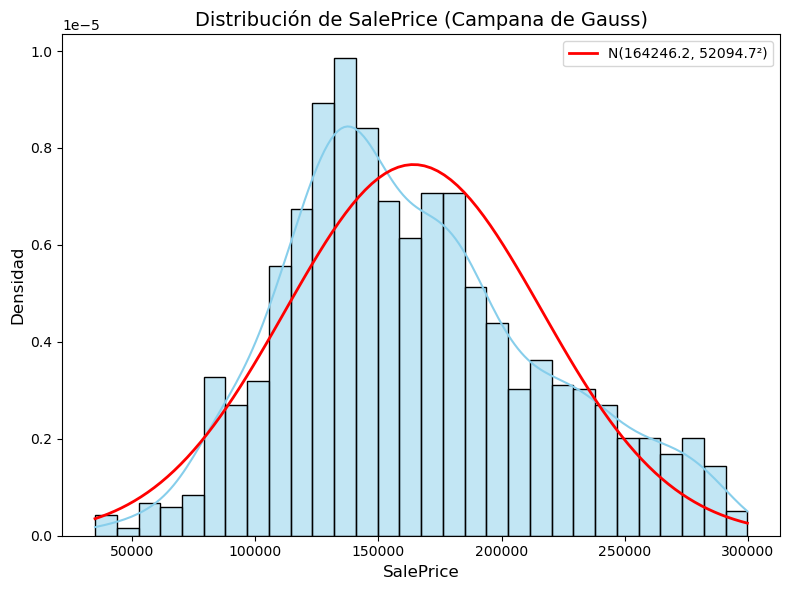

In [93]:
# Crear figura y eje único
fig, ax = plt.subplots(figsize=(8,6))


# Datos
data = archivoTrain['SalePrice']

# Histograma + KDE
sns.histplot(data, kde=True, stat="density", bins=30, color="skyblue", edgecolor="black", ax=ax)

# Ajuste normal (campana de Gauss)
mu, sigma = data.mean(), data.std()
x = np.linspace(data.min(), data.max(), 100)
y = norm.pdf(x, mu, sigma)
ax.plot(x, y, 'r-', linewidth=2, label=f'N({mu:.1f}, {sigma:.1f}²)')

# Etiquetas y título
ax.set_title("Distribución de SalePrice (Campana de Gauss)", fontsize=14)
ax.set_xlabel("SalePrice", fontsize=12)
ax.set_ylabel("Densidad", fontsize=12)
ax.legend()

# Ajustar diseño
plt.tight_layout()
plt.show()